In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data_set = pd.read_csv('Evaluate_1.csv', delimiter=',')

data_set.head()

,Date,Market,Keyword,Average.Position,CPC,CTR (%),Impressions,Cost
0,20130214,US-Market,cheap insurance life term,0.0,0.00,0.0,0,0.00
1,20130214,US-Market,home loans refinancing,1.0,7.63,3.8,445,130.41
2,20130214,US-Market,consolidate college loans,0.0,0.00,0.0,0,0.00
3,20130214,US-Market,cheap life insurance,1.0,58.88,3.3,931,1806.63
4,20130214,US-Market,vioxx law suit,0.0,0.00,0.0,0,0.00


In [44]:
print(data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
Date                400 non-null int64
Market              400 non-null object
Keyword             400 non-null object
Average.Position    400 non-null float64
CPC                 400 non-null float64
CTR (%)             400 non-null float64
Impressions         400 non-null int64
Cost                400 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 25.1+ KB
None


In [45]:
data_set['Word_Count'] = data_set['Keyword'].apply(lambda x: len(str(x).split(" ")))

data_set.Word_Count.describe()

count    400.000000
mean       2.930000
std        1.121715
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        6.000000
Name: Word_Count, dtype: float64

In [47]:
data_frame = pd.DataFrame(data_set)

df = data_frame.drop_duplicates()

removed_NaN = df.dropna().reset_index(drop=True)

sorted_values = removed_NaN.sort_values('CTR (%)', ascending=False).reset_index(drop=True)

print(sorted_values.head())

       Date     Market          Keyword  Average.Position    CPC  CTR (%)  \
0  20130214  US-Market  auto insurances               1.0  20.26      6.5   
1  20130214  US-Market  auto insurances               1.0  25.30      6.1   
2  20130214  US-Market  at and t phones               1.0   6.79      5.5   
3  20130214  US-Market  at and t phones               1.0   6.79      5.2   
4  20130214  UK-Market       Cord Blood               1.0   7.87      5.1   

   Impressions    Cost  Word_Count  
0          393  515.58           2  
1          335  517.54           2  
2           74   28.00           4  
3          127   44.98           4  
4          283  113.04           2  


In [48]:
new_dataframe = sorted_values.drop(['Date', 'Average.Position', 'Impressions'], axis=1)

In [49]:
print(new_dataframe.describe())

              CPC     CTR (%)          Cost  Word_Count
count  323.000000  323.000000    323.000000  323.000000
mean    12.456068    1.257585    905.705635    2.835913
std     41.726243    1.520000   3478.416357    1.166701
min      0.000000    0.000000      0.000000    1.000000
25%      0.000000    0.000000      0.000000    2.000000
50%      0.000000    0.000000      0.000000    3.000000
75%      8.045000    2.500000    148.520000    4.000000
max    408.390000    6.500000  28901.360000    6.000000


In [50]:
print(new_dataframe.head())

      Market          Keyword    CPC  CTR (%)    Cost  Word_Count
0  US-Market  auto insurances  20.26      6.5  515.58           2
1  US-Market  auto insurances  25.30      6.1  517.54           2
2  US-Market  at and t phones   6.79      5.5   28.00           4
3  US-Market  at and t phones   6.79      5.2   44.98           4
4  UK-Market       Cord Blood   7.87      5.1  113.04           2


In [52]:
groupby_df = new_dataframe.groupby(['Market', 'Keyword', 'CTR (%)'], as_index=False).sum()

In [53]:
summary = groupby_df.sort_values('CTR (%)', ascending=False).reset_index(drop=True)

In [54]:
print(summary.head())

      Market          Keyword  CTR (%)    CPC    Cost  Word_Count
0  US-Market  auto insurances      6.5  20.26  515.58           2
1  US-Market  auto insurances      6.1  25.30  517.54           2
2  US-Market  at and t phones      5.5   6.79   28.00           4
3  US-Market  at and t phones      5.2   6.79   44.98           4
4  UK-Market       Cord Blood      5.1   7.87  113.04           2


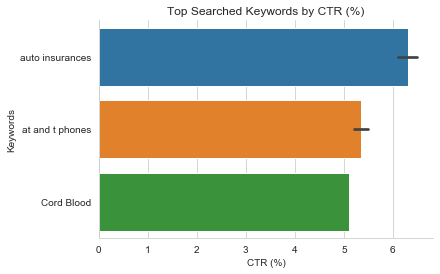

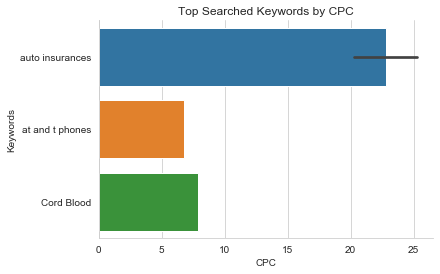

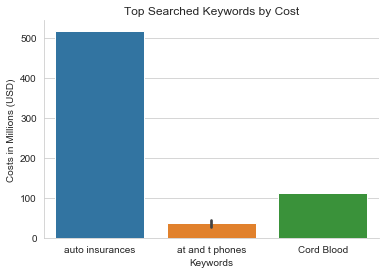

In [55]:
# First graph of Keywords by Clicks

sns.set_style('whitegrid')

sns.barplot(x='CTR (%)', y='Keyword', data=summary.head())

plt.title('Top Searched Keywords by CTR (%)')

plt.xlabel('CTR (%)')

plt.ylabel('Keywords')

sns.despine()

plt.show()

# Second graph of Keywords by CPC

sns.set_style('whitegrid')

sns.barplot(x='CPC', y='Keyword', data=summary.head())

plt.title('Top Searched Keywords by CPC')

plt.xlabel('CPC')

plt.ylabel('Keywords')

sns.despine()

plt.show()

# Third graph of Keywords by Cost for funds allocation

sns.set_style('whitegrid')

sns.barplot(x='Keyword', y='Cost', data=summary.head())

plt.title('Top Searched Keywords by Cost')

plt.xlabel('Keywords')

plt.ylabel('Costs in Millions (USD)')

sns.despine()

plt.show()

In [56]:
#Identify common words
freq_keywords = pd.Series(' '.join(summary['Keyword']).split()).value_counts()[:20]
freq_keywords

home             36
insurance        33
equity           32
credit           28
attorney         21
lawyer           21
life             19
loan             19
loans            18
line             18
refinance        15
york             14
Adsense          14
new              14
criminal         13
consolidation    12
los              11
angeles          11
injury           11
of               11
dtype: int64

In [57]:
#Identify uncommon words
infreq_keywords =  pd.Series(' '.join(summary['Keyword']).split()).value_counts()[-20:]
infreq_keywords

adsense          2
Call             2
temporary        2
Blood            2
tips             2
with             2
mass             2
hack             2
arizona          2
earn             2
international    2
suit             2
secured          2
link             2
compensation     2
Software         2
refinanced       2
Cord             2
Trading          2
litigation       2
dtype: int64